<a href="https://colab.research.google.com/github/soumodeep60/Python/blob/main/SD__Text_analysis_of_The_Leela_Palace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text analysis of one of the most popular destination wedding spot 'The Leela Palace'.<br>
Soumodeep das <br>
*soumodeep.das@praxis.ac.in*

**Web scrapping**

Importing essential libraries

In [ ]:
!pip install kora -q
!pip install selenium

     |████████████████████████████████| 57 kB 2.8 MB/s 
     |████████████████████████████████| 1.6 MB 9.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.2 MB 4.9 MB/s 
     |████████████████████████████████| 140 kB 62.4 MB/s 
     |████████████████████████████████| 384 kB 52.0 MB/s 
     |████████████████████████████████| 58 kB 5.3 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.12 which is incompatible.


In [ ]:
import selenium
from kora.selenium import wd as browser
from selenium.webdriver.common.by import By
import pandas as pd 
import time
from datetime import date,datetime as dt
import datetime
from bs4 import BeautifulSoup
import numpy as np
import re 

Create a blank list

In [ ]:

dataset=[]

Scrapping data from Tripadvisor website

In [ ]:
url="https://www.tripadvisor.in/Hotel_Review-g297672-d1440338-Reviews-The_Leela_Palace_Udaipur-Udaipur_Udaipur_District_Rajasthan.html"
browser.get(url)
xx= browser.find_elements(By.XPATH,'//div[@class="lszDU"]')
def click(p):
  try:
    p.click()
  except:
    pass
  
d_x=[click(x) for x in xx]

containers=[x.get_attribute('innerHTML') for x in browser.find_elements(By.XPATH,'//div[@class="YibKl MC R2 Gi z Z BB pBbQr"]')]

for container in containers:
  rev1=dict()
  bsObj=BeautifulSoup(container)
  rev=bsObj.find('div',attrs={"class":"_T FKffI bmUTE"}).text 
  dataset.append(rev)

In [ ]:
dataset

["This was the best stay i ever had in my life. The whole experience was worth the money. The environment was breathtaking. The beautiful lake and Aravali hills was just cherry on top. The facilities were all good and comfortable. I would surely recommend everyone to don't ever miss this chance. And I guess it wouldn't be possible without Sheetal and her team. Thanks to sheetal and her team for the hospitality and making our best visit the best. Read more",
 "This short four day trip to Udaipur - The Leela Palace was our meant to be out pit stop amidst a very busy month.  And we really did not want to leave..  If the review allowed for only one thing to be talked about, then it would be the service and hospitality at the Leela palace.    Their understanding of the customer is intuitve, they are gracious to the fault and while they are all smart, young and modern, they exemplify the glorious Indian hospitality.  Each and every person, on our 4 days stay made us feel very very special.  

In [ ]:
for i in range(1,10):
    c=10*i
    url="https://www.tripadvisor.in/Hotel_Review-g297672-d1440338-Reviews-or{c}-The_Leela_Palace_Udaipur-Udaipur_Udaipur_District_Rajasthan.html#REVIEWS"
    browser.get(url)
    xx= browser.find_elements(By.XPATH,'//div[@class="lszDU"]')
    d_x=[click(x) for x in xx]
    containers=[x.get_attribute('innerHTML') for x in browser.find_elements(By.XPATH,'//div[@class="YibKl MC R2 Gi z Z BB pBbQr"]')]
    try:
      for container in containers:
        bsObj=BeautifulSoup(container)
        rev=bsObj.find('div',attrs={"class":"fIrGe _T"}).text 
        dataset.append(rev)
    except:
      pass

In [ ]:
dataset

["This was the best stay i ever had in my life. The whole experience was worth the money. The environment was breathtaking. The beautiful lake and Aravali hills was just cherry on top. The facilities were all good and comfortable. I would surely recommend everyone to don't ever miss this chance. And I guess it wouldn't be possible without Sheetal and her team. Thanks to sheetal and her team for the hospitality and making our best visit the best. Read more",
 "This short four day trip to Udaipur - The Leela Palace was our meant to be out pit stop amidst a very busy month.  And we really did not want to leave..  If the review allowed for only one thing to be talked about, then it would be the service and hospitality at the Leela palace.    Their understanding of the customer is intuitve, they are gracious to the fault and while they are all smart, young and modern, they exemplify the glorious Indian hospitality.  Each and every person, on our 4 days stay made us feel very very special.  

In [ ]:
len(dataset)

100

**Text analysis**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [ ]:
!python -m spacy download en_core_web_lg

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
2022-11-19 15:02:53.458354: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 587.7 MB 16 kB/s 
     |████████████████████████████████| 127 kB 5.0 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.12
    Uninstalling urllib3-1.26.12:
      Successfully uninstalled urllib3-1.26.12
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
selenium 4.6.0 requires urllib3[socks]~=1.26, but you have urllib3 1.25.11 which is incompatibl

In [ ]:
import spacy

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [ ]:
nlp=spacy.load('en_core_web_lg')

In [ ]:
t=" ".join(dataset)

In [ ]:
t

"This was the best stay i ever had in my life. The whole experience was worth the money. The environment was breathtaking. The beautiful lake and Aravali hills was just cherry on top. The facilities were all good and comfortable. I would surely recommend everyone to don't ever miss this chance. And I guess it wouldn't be possible without Sheetal and her team. Thanks to sheetal and her team for the hospitality and making our best visit the best. Read more This short four day trip to Udaipur - The Leela Palace was our meant to be out pit stop amidst a very busy month.  And we really did not want to leave..  If the review allowed for only one thing to be talked about, then it would be the service and hospitality at the Leela palace.    Their understanding of the customer is intuitve, they are gracious to the fault and while they are all smart, young and modern, they exemplify the glorious Indian hospitality.  Each and every person, on our 4 days stay made us feel very very special.   Whet

In [ ]:
nlp.max_length = 1125197

In [ ]:
texts=nlp(t)

In [ ]:
for token in texts[:20]: 
  print(token.text,token.pos_) 

This PRON
was AUX
the DET
best ADJ
stay NOUN
i PRON
ever ADV
had VERB
in ADP
my PRON
life NOUN
. PUNCT
The DET
whole ADJ
experience NOUN
was AUX
worth ADJ
the DET
money NOUN
. PUNCT


In [ ]:
for ent in texts.ents:
  print(ent.text,ent.label_)

Aravali NORP
Sheetal PERSON
sheetal PERSON
four day DATE
The Leela Palace WORK_OF_ART
a very busy month DATE
only one CARDINAL
Leela PERSON
Indian NORP
our 4 days DATE
two CARDINAL
Maggi PERSON
10 year old DATE
Leela PERSON
Maggi PERSON
Butlers NORP
Avishek ORG
Raveena ORG
first ORDINAL
Ananya PERSON
Krittika PERSON
Sandeep ORG
Palace ORG
the Pichola lake LOC
the Sheesh Mahal FAC
Guava Garden PERSON
The Rooms and Interiors  Very ORG
Leela Palace FAC
Mewar GPE
Rajasthan GPE
Udaipur GPE
a minute TIME
Lakeview ORG
Courtyard FAC
two CARDINAL
two CARDINAL
Jetty's - Doodh Talaiya ORG
Brahmpole ORG
a Tuk Tuk PERSON
three CARDINAL
Atithi PERSON
first ORDINAL
Sheetal PERSON
2 nights TIME
Royal ORG
one CARDINAL
Giri PERSON
Kanishk GPE
Vivek PERSON
first ORDINAL
the Leela Palace FAC
Sheetal PERSON
easy!Read PERSON
mahal PERSON
Divyanshu PERSON
Deepak PERSON
Maas PERSON
Divyanshu PERSON
Sheetal PERSON
Sheetal PERSON
sure!!Read ORG
One CARDINAL
Reshab PERSON
Aravali NORP
Sheetal PERSON
sheetal PERS

In [ ]:
experience=[ent for ent in texts.ents if ent.label_ in ["LOC","FAC","GPE"]]

In [ ]:
f=" ".join(str(v) for v in experience)  

Attraction points

In [ ]:
from wordcloud import WordCloud,STOPWORDS
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter 

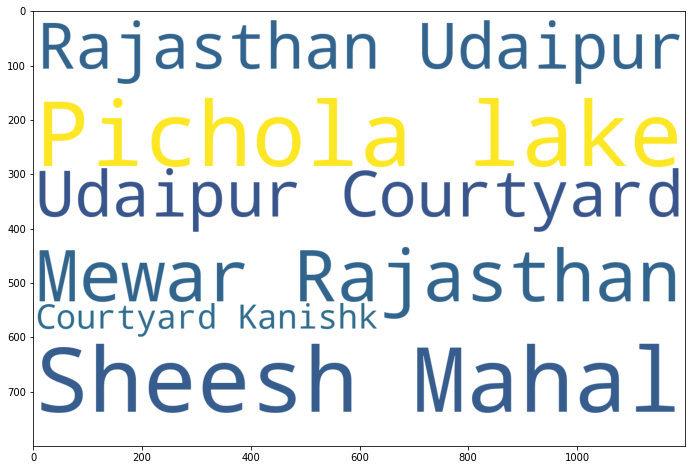

In [ ]:
wc=WordCloud(width=1200,height=800,stopwords=list(STOPWORDS)+["The",'Leela',"Palace"],background_color="white")
plt.figure(figsize=(12,8))
plt.imshow(wc.generate_from_text(f))
plt.show()

Adjectives (Experiences)

In [ ]:
text_dictionary = wc.process_text(f)
# sort the dictionary
word_freq={k: v for k, v in sorted(text_dictionary.items(),reverse=True, key=lambda item: item[1])}

#use words_ to print relative word frequencies
rel_freq=wc.words_

#print results
print(list(word_freq.items())[:20])
print(list(rel_freq.items())[:20])

[('Pichola lake', 10), ('Sheesh Mahal', 10), ('Mewar Rajasthan', 10), ('Rajasthan Udaipur', 10), ('Udaipur Courtyard', 10), ('Courtyard Kanishk', 10)]
[('Pichola lake', 1.0), ('Sheesh Mahal', 1.0), ('Mewar Rajasthan', 1.0), ('Rajasthan Udaipur', 1.0), ('Udaipur Courtyard', 1.0), ('Courtyard Kanishk', 1.0)]


In [ ]:
a=[adj for adj in texts if adj.pos_=="ADJ"]

In [ ]:
f=" ".join(str(v) for v in a)  

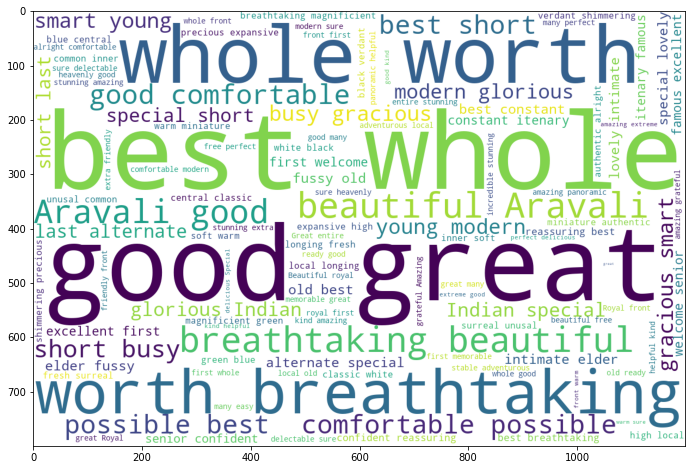

In [ ]:
wc=WordCloud(width=1200,height=800,stopwords=list(STOPWORDS)+["The",'Leela',"Palace"],background_color="white")
plt.figure(figsize=(12,8))
plt.imshow(wc.generate_from_text(f))
plt.show()